In [1]:
import os
import cv2
import matplotlib.pyplot as plt
import numpy as np
from sklearn.model_selection import train_test_split
from keras.models import Sequential
from keras.layers import Dense, Conv2D, MaxPooling2D, Flatten

# Set the image size and channels
img_size = (256, 256)
channels = 3

# Define the image directories
f1 = 'C:\\Users\\Singh\\Desktop\\New folder (2)\\ML Assignment\\Images\\8x shampoo'
f2 = 'C:\\Users\\Singh\\Desktop\\New folder (2)\\ML Assignment\\Images\\saslic'
f3 = 'C:\\Users\\Singh\\Desktop\\New folder (2)\\ML Assignment\\Images\\wow'

# Create lists for images and labels
images = []
labels = []

In [2]:
f1_count = 0
f2_count = 0
f3_count = 0
# Load the images and labels
for label, folder in enumerate([f1, f2, f3]):
    for imgname in os.listdir(folder):#stores all names of img in a list imgname
        if not imgname.endswith(('.jpg', '.png', '.jpeg','.webp','.avif','jfif')):
            continue
        image_path = os.path.join(folder, imgname) # joins path of folder with the each img in list 'imgename' & create complete path of image
        try:
            img_array = cv2.imread(image_path)#to read all img in image_path
            #img_array stores array of image's pixels
            if img_array is None or img_array.size == 0:
                print(f"Error reading image: {image_path}")
                continue
            img = cv2.resize(img_array, img_size)#resizes the img_array to the dimensions specified in the img_size
            img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)#from BGR to RGB becz matplotlib,CNN follows RGR conventions 
            images.append(img)
            labels.append(label)
        except Exception as e:
            print(f"Error processing image: {image_path}: {e}")
            continue
        
        # Increment directory counter
        if folder == f1:
            f1_count += 1
        elif folder == f2:
            f2_count += 1
        elif folder == f3:
            f3_count += 1

print(f"Number of images in {f1}: {f1_count}")
print(f"Number of images in {f2}: {f2_count}")
print(f"Number of images in {f3}: {f3_count}")


Error reading image: C:\Users\Singh\Desktop\New folder (2)\ML Assignment\Images\wow\7.avif
Number of images in C:\Users\Singh\Desktop\New folder (2)\ML Assignment\Images\8x shampoo: 8
Number of images in C:\Users\Singh\Desktop\New folder (2)\ML Assignment\Images\saslic: 13
Number of images in C:\Users\Singh\Desktop\New folder (2)\ML Assignment\Images\wow: 24


In [3]:
# Convert the images and labels to NumPy arrays
images = np.array(images)
labels = np.array(labels)

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(images, labels, test_size=0.2, random_state=42)

In [4]:
# Normalizing  pixel values so it lies between 0 and 1 
X_train = X_train / 255.0
X_test = X_test / 255.0
X_train

array([[[[0.99215686, 0.99215686, 0.99215686],
         [0.99215686, 0.99215686, 0.99215686],
         [0.99215686, 0.99215686, 0.99215686],
         ...,
         [1.        , 1.        , 1.        ],
         [1.        , 1.        , 1.        ],
         [1.        , 1.        , 1.        ]],

        [[0.99215686, 0.99215686, 0.99215686],
         [0.99215686, 0.99215686, 0.99215686],
         [0.99607843, 0.99607843, 0.99607843],
         ...,
         [1.        , 1.        , 1.        ],
         [1.        , 1.        , 1.        ],
         [1.        , 1.        , 1.        ]],

        [[0.99215686, 0.99215686, 0.99215686],
         [0.99215686, 0.99215686, 0.99215686],
         [0.99607843, 0.99607843, 0.99607843],
         ...,
         [0.99607843, 0.99607843, 0.99607843],
         [1.        , 1.        , 1.        ],
         [1.        , 1.        , 1.        ]],

        ...,

        [[0.98431373, 0.99607843, 1.        ],
         [0.97254902, 1.        , 1.        ]

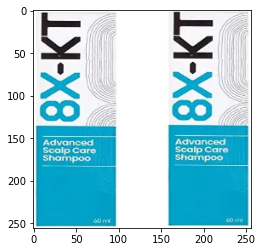

In [5]:

plt.imshow(X_train[0])

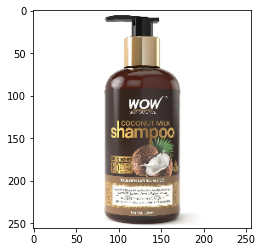

In [6]:
plt.imshow(X_test[0])

In [7]:

# Define the CNN model
model = Sequential()
model.add(Conv2D(32, (3, 3), activation='relu', input_shape=(img_size[0], img_size[1], channels)))
#32 filters with 3,3 size
model.add(MaxPooling2D((2, 2)))
# 2,2 is filter size 
model.add(Conv2D(64, (3, 3), activation='relu'))
model.add(MaxPooling2D((2, 2)))
model.add(Conv2D(128, (3, 3), activation='relu'))
model.add(MaxPooling2D((2, 2)))
model.add(Conv2D(256, (3, 3), activation='relu'))
model.add(MaxPooling2D((2, 2)))
model.add(Flatten())
model.add(Dense(128, activation='relu')) 
model.add(Dense(3, activation='softmax')) #final layer softmax becz of multi-class classification 


In [ ]:
# Compile the model and loss is sparse_categorical_crossentropy becz our final result is either 0,1 or 2 
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])



# Train the model and store the history to plot the graph
from keras.callbacks import EarlyStopping
early_stopping = EarlyStopping(monitor='val_loss', patience=5)
history = model.fit(X_train, y_train, epochs=50, validation_data=(X_test, y_test), callbacks=[early_stopping])

# Evaluate the model on the testing set
loss, accuracy = model.evaluate(X_test, y_test)
print(loss,accuracy)
print(f"Test loss: {loss:.4f}")
print(f"Test accuracy: {accuracy:.4f}")

Epoch 1/50
2/2 [==============================] - 3s 524ms/step - loss: 1.1912 - accuracy: 0.4444 - val_loss: 0.8902 - val_accuracy: 0.7778
Epoch 2/50
2/2 [==============================] - 2s 372ms/step - loss: 0.9715 - accuracy: 0.6944 - val_loss: 0.7136 - val_accuracy: 0.6667
Epoch 3/50
2/2 [==============================] - 2s 412ms/step - loss: 0.8379 - accuracy: 0.5000 - val_loss: 0.4438 - val_accuracy: 1.0000
Epoch 4/50


In [ ]:
yprob=model.predict(X_test)

In [ ]:
ypred=yprob.argmax(axis=1)
ypred

In [ ]:
from sklearn.metrics import classification_report
print(classification_report(y_test,ypred))


In [ ]:
import matplotlib.pyplot as plt
plt.plot(history.history['loss'],color='red',label='train')
plt.plot(history.history['val_loss'],color='blue',label='test')
plt.legend()
plt.show()
#model gives good result for both training and test data 

In [ ]:

# Plot the training and validation accuracy
plt.plot(history.history['accuracy'], color='red', label='train')
plt.plot(history.history['val_accuracy'], color='blue', label='test')
plt.legend()
plt.show()
# as epochs increase our accuracy increases and there is no gap between 2 lines so no overfitting 

In [ ]:
import random

idx = random.randint(0, len(y_test) - 1)
plt.imshow(X_test[idx,:])
plt.show()
y_pred = model.predict(X_test[idx,:].reshape(1,256,256,3))
print(y_pred )
print()
print('The Product is :')
threshold = 0.85 # set a threshold value for probability
if y_pred[0][0] >threshold:
    print('*'*5,'8x shampoo','*'*5)
elif y_pred[0][1] > threshold:
    print('*'*5,'saslic','*'*5)
elif y_pred[0][2] > threshold:
    print('*'*5,'wow','*'*5)

#TThis code classifies an input image using a trained model. 
#It prints the label with the highest predicted probability, as long as the probability is greater than a given threshold.
#The code demonstrates a simple way to classify images based on predicted probabilities